<a href="https://colab.research.google.com/github/NermeenSaber/SIFT-Matching-computer-vision-task/blob/main/SIFT_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''
I applied crossCheck and David low each one of them independently (calculating similarity of each one independently)
and crossCheck with Non-constant-threshold with each other
'''

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def _data():
    data_img = os.listdir('/content/drive/MyDrive/Projects/SIFT Matching/assignment data')
    dataPath = []
    for i in data_img:
        path = os.path.join('/content/drive/MyDrive/Projects/SIFT Matching/assignment data/', i)
        dataPath.append(path)

    pairs = []
    for p in range(0, len(dataPath) - 1, 2):
        if p < 6:
            pairs.append([dataPath[p], dataPath[p + 1]])
        elif p == 6:
            a = p
            b = p + 1
            c = p + 2
            pairs.append([dataPath[a], dataPath[b]])
            pairs.append([dataPath[b], dataPath[c]])
            pairs.append([dataPath[a], dataPath[c]])
        else:
            pairs.append([dataPath[p + 1], dataPath[p + 2]])

    return pairs

In [3]:
def Matching_with_David_low(bf, des1, des2, ratio):
    matchesKnn = bf.knnMatch(des1, des2, 2)
    matches = []
    for m in matchesKnn:
        dis1 = m[0].distance
        dis2 = m[1].distance
        if (dis1 / dis2) < ratio:
            matches.append(m)
    return matches

In [4]:
def  CrossCheck(des1,des2 , bf):
    match1 = bf.match(des1,des2)
    match2 = bf.match(des2,des1)
    # print(len(match1)==len(match2))
    good_matches=[]
    for m1 in match1:
        for m2 in match2:
            if m1.queryIdx == m2.trainIdx and m1.trainIdx==m2.queryIdx:
                good_matches.append(m1)
    return good_matches


In [5]:
def None_constant_threshold( matches ):
    goodMatches=[]
    # matches = bf.match(des1, des2)
    sum=0
    num = 0
    while num != len(matches):
        sum += matches[num].distance
        num += 1

    mean = sum/len(matches)
    for m in matches:
        if m.distance <mean:
          goodMatches.append(m)

    return goodMatches


In [6]:
def crossCheck_then_Non_constant_threshold(des1,des2,bf):
    matches = CrossCheck(des1, des2, bf)
    good = None_constant_threshold(matches)
    return good

In [7]:
def DavidLow_then_Non_constant_threshold(des1,des2,bf , ratio):
    matches = Matching_with_David_low(bf, des1, des2, ratio)
    good = None_constant_threshold(matches)
    return good


In [8]:
def similarity_score(matchesNum , kp1Num , kp2Num):
    score = matchesNum / min(kp1Num , kp2Num)
    return score

In [9]:
def sift(filter , ratio = 0.75 , pairs=[]):
    sift = cv2.SIFT_create()
    bf = cv2.BFMatcher()

    for pair in pairs:

        image1 = cv2.imread(pair[0], 0)
        image2 = cv2.imread(pair[1], 0)

        kp1, des1 = sift.detectAndCompute(image1, None)
        kp2, des2 = sift.detectAndCompute(image2, None)
        matches = []
        if filter == 1: #David lows ration test
            matches = Matching_with_David_low(bf, des1, des2, ratio)
            outimg = cv2.drawMatchesKnn(image1, kp1, image2, kp2,
                                      matches[0:100],
                                      None,
                                      flags=2)

            plt.imshow(outimg), plt.show()
        elif filter==2:
            matches = CrossCheck(des1,des2 , bf)
            outimg = cv2.drawMatches(image1, kp1,
                                   image2, kp2,
                                   matches[0:100],
                                   flags=2, outImg=None)

            plt.imshow(outimg), plt.show()
        elif filter==3:
            matches = crossCheck_then_Non_constant_threshold(des1,des2,bf)
            outimg = cv2.drawMatches(image1, kp1,
                                     image2, kp2,
                                     matches[0:100],
                                     flags=2, outImg=None)

            plt.imshow(outimg), plt.show()
        # elif filter ==4:
        #     matches = DavidLow_then_Non_constant_threshold(des1, des2, bf , 0.75)
        #     outimg = cv2.drawMatches(image1, kp1,
        #                              image2, kp2,
        #                              matches[0:100],
        #                              flags=2, outImg=None)

            # plt.imshow(outimg), plt.show()



        m, p1, p2 = len(matches), len(kp1), len(kp2)
        similarity = similarity_score(m, p1, p2)
        print('similarity of', pair, "= ", similarity)



In [13]:
filter_type = input("Enter type of filter you want:\n1 : David lows ratio test \n2 : cross check\n3: applying crossCheck then Non costant threshold method\n")


Enter type of filter you want:
1 : David lows ratio test 
2 : cross check
3: applying crossCheck then Non costant threshold method
2


#cross check

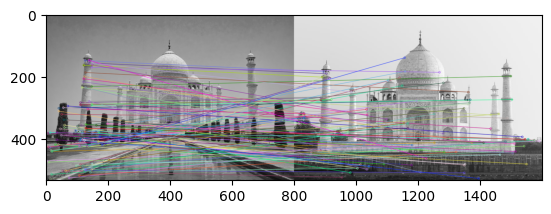

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7b.jpeg'] =  0.25076452599388377


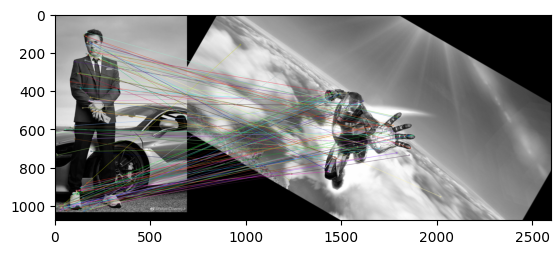

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4c.png'] =  0.28710304601425796


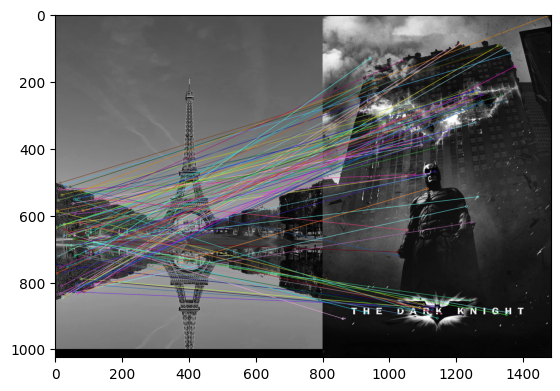

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2a.jpeg'] =  0.26966824644549764


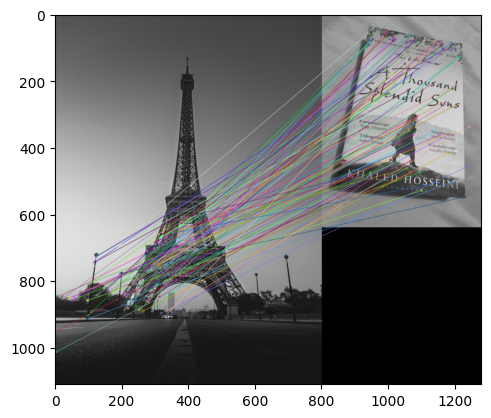

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg'] =  0.2838983050847458


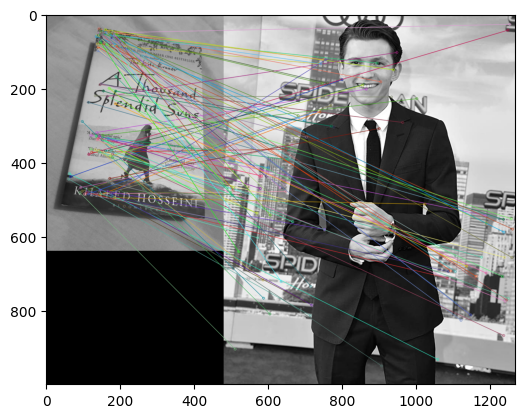

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.3855932203389831


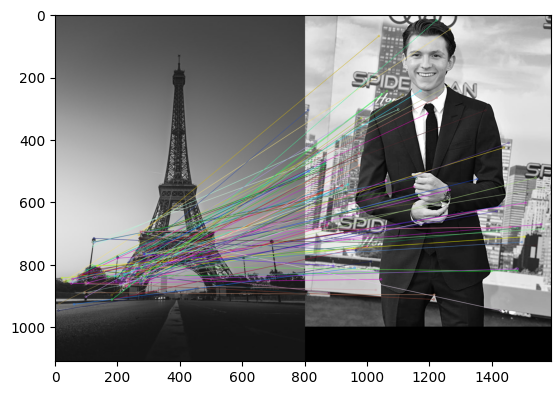

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.29526598340653976


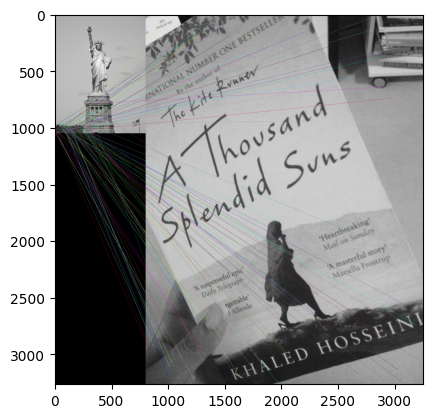

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1b.jpeg'] =  0.3784860557768924


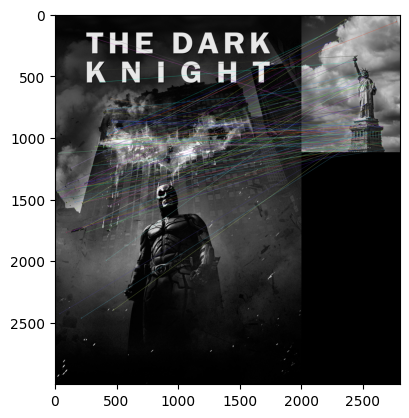

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5b.jpeg'] =  0.5679715302491103


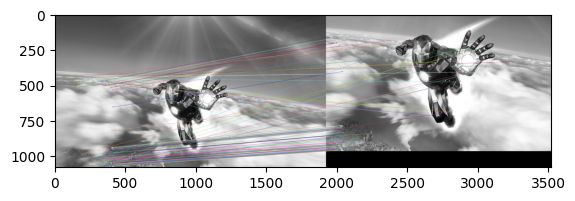

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4a.jpeg'] =  0.6411205073995772


In [14]:
p = _data()
sift(int(filter_type),0.75,p)

#David lows ratio test

In [15]:
filter_type1 = input("Enter type of filter you want:\n1 : David lows ratio test \n2 : cross check\n3: applying crossCheck then Non costant threshold method\n")


Enter type of filter you want:
1 : David lows ratio test 
2 : cross check
3: applying crossCheck then Non costant threshold method
1


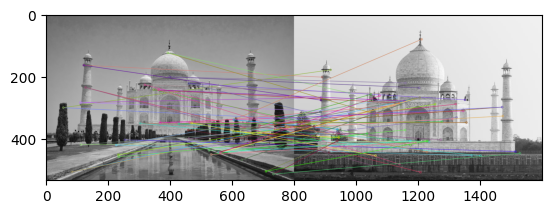

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7b.jpeg'] =  0.018858307849133536


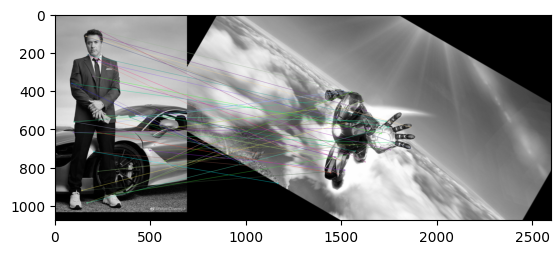

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4c.png'] =  0.016202203499675955


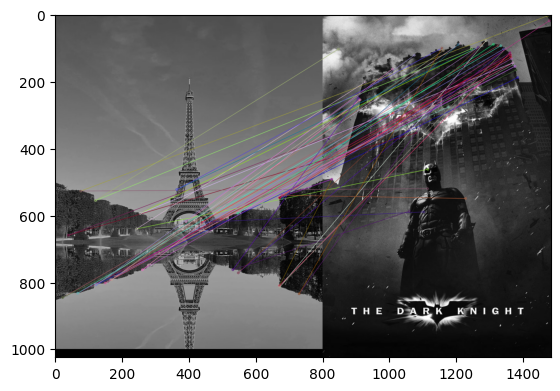

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2a.jpeg'] =  0.012322274881516588


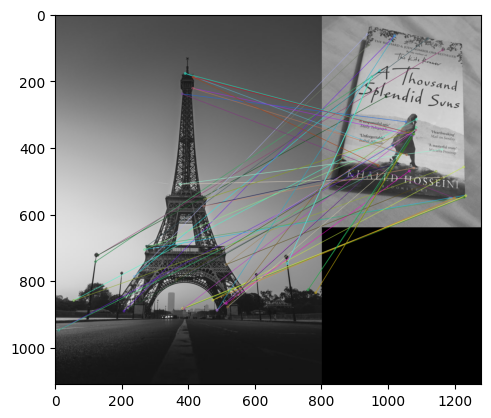

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg'] =  0.02457627118644068


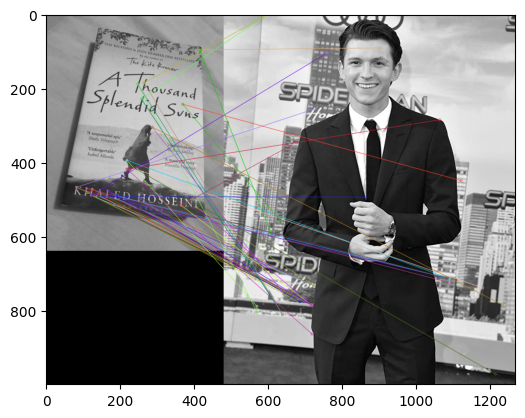

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.020338983050847456


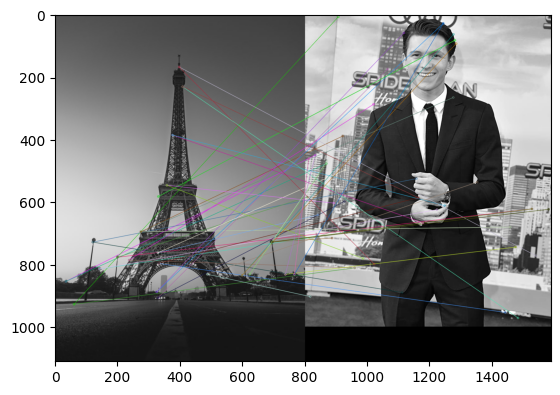

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.01171303074670571


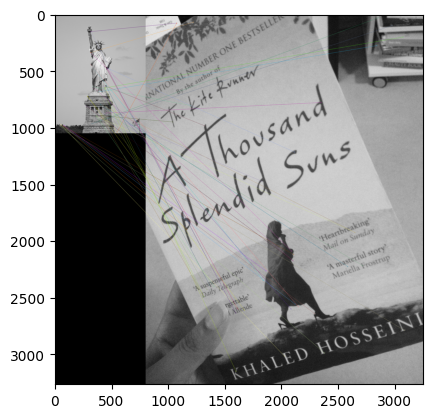

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1b.jpeg'] =  0.010956175298804782


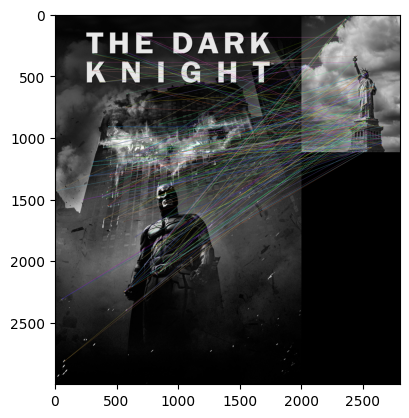

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5b.jpeg'] =  0.1309608540925267


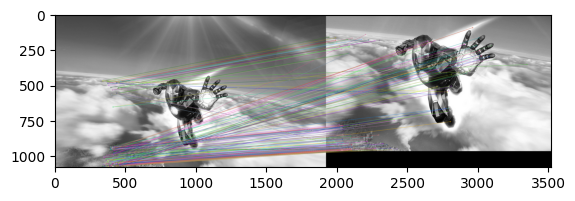

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4a.jpeg'] =  0.49841437632135305


In [16]:
sift(int(filter_type1),0.75,p)

#applying crossCheck then Non costant threshold method

In [17]:
filter_type2 = input("Enter type of filter you want:\n1 : David lows ratio test \n2 : cross check\n3: applying crossCheck then Non costant threshold method\n")


Enter type of filter you want:
1 : David lows ratio test 
2 : cross check
3: applying crossCheck then Non costant threshold method
3


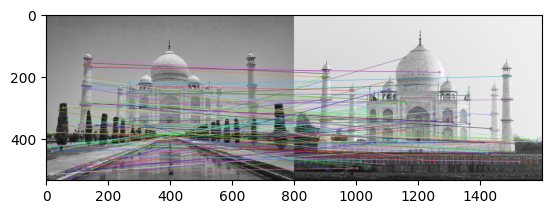

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image7b.jpeg'] =  0.12334352701325178


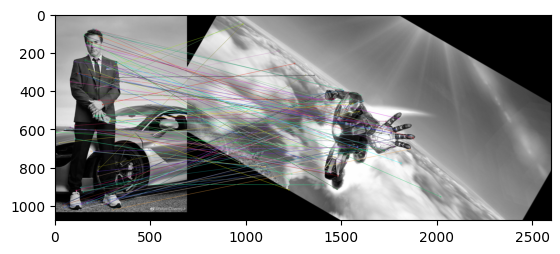

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4c.png'] =  0.10563836681788723


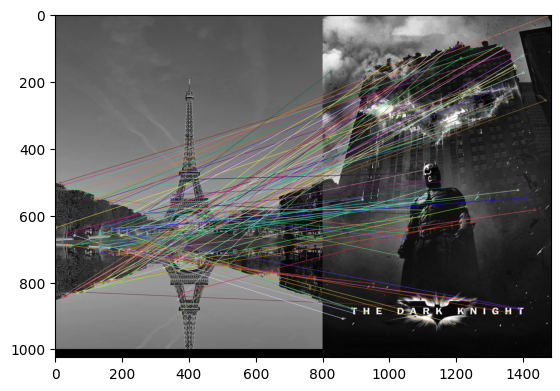

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2a.jpeg'] =  0.1009478672985782


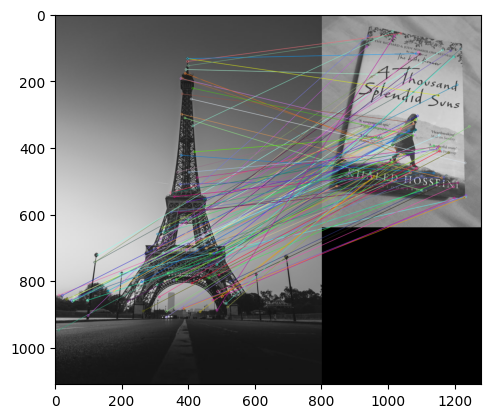

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg'] =  0.10423728813559321


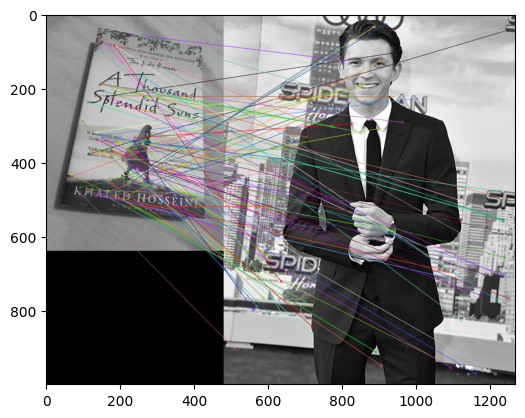

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.1576271186440678


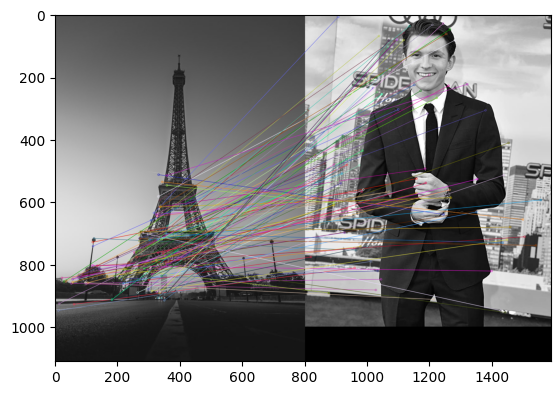

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image3a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image6b.jpeg'] =  0.12152269399707175


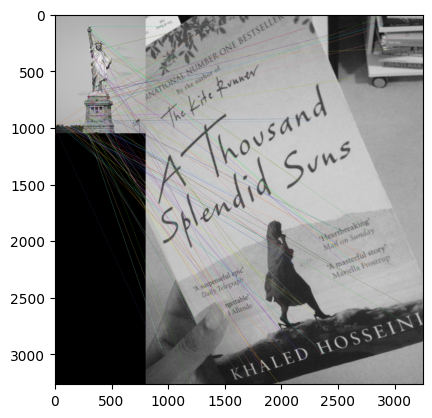

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5a.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image1b.jpeg'] =  0.1454183266932271


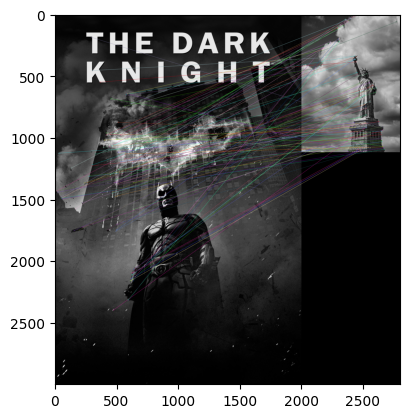

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image2b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image5b.jpeg'] =  0.2412811387900356


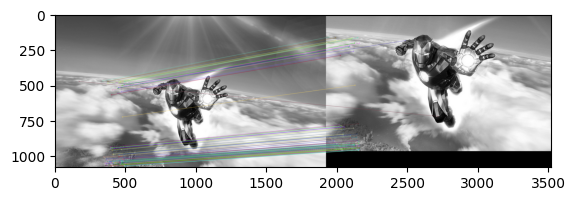

similarity of ['/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4b.jpeg', '/content/drive/MyDrive/Projects/SIFT Matching/assignment data/image4a.jpeg'] =  0.3752642706131078


In [18]:
sift(int(filter_type2),0.75,p)